# **Basic Data Science Projects using Python, NumPy, Pandas, Matplotlib, Regular Expressions, and SQL**

<center>

*By: Prof. James Abello, Haoyang Zhang*

*Computer Science Department*

*Rutgers University*

*Nov. 21, 2024.*

</center>

## Topic 1: Game of Life (NumPy, matplotlib)

#### **Objective:** Implement using NumPy and matplotlib a custom version of the Game of Life where users can provide their own update rules.

#### **Estimated Completion Time: 6 hours**


This game is an example of a Cellular Automaton. Each cell corresponds to a point in 2D.

A good video reference is 
> Stephen Hawkings The Meaning of Life (John Conway's Game of Life segment) by 0524432
> 
> https://www.youtube.com/watch?v=CgOcEZinQ2I

Consider a grid of 2D cells each represented by a 2D unit square. Each cell has two states: dead (encoded as 0) or alive (encoded as 1). Each cell in the grid is updated in discrete time steps depending on the **state of its eight neighbors**. 

Initially, some cells are selected randomly to be alive and the rest are dead. The grid is updated in **each time step** according to the following **basic** rules:
- if a dead cell has 3 neighbors alive, then it the comes back to life
- if an alive cell has 2 or 3 neighbors alive, then the cell continues to be alive.
- if an alive cell has less than 2 or more than 3 neighbors alive, then the cell dies.

**The goal** of the game is to find patterns that evolve in interesting ways – something that people have now been doing for over 50 years.
> https://playgameoflife.com/

For example:
- gliders: 
    > https://playgameoflife.com/lexicon/glider
- spaceships:
    > https://playgameoflife.com/lexicon#iz5
- splitter
    > https://playgameoflife.com/lexicon/splitter
- Herschel receiver
    > https://playgameoflife.com/lexicon/herschel-receiver
- G4 receiver
    > https://playgameoflife.com/lexicon/G4_receiver

**What to submit:**
- Your code that simulates the game of life with the **basic rules**.
- A 30-second video of a pattern that was generated by your code and you find surprising or interesting.

An approach to be successful is to design on local patterns that could generate other patterns according to the specified rules. Another approach is to try to understand the effect of different rules.

### Tasks

#### Level 1 (fixed set of rules, 15 pts) 
From a randomly selected initial subset of life cells, and a fixed set of rules, find interesting patterns

```mermaid
graph TB
    Init["Generate an initial random subset of life cells (2D points)"]
    Draw_init["Display the 2D positions of the selected collection of cells (2D points)"]
    Update["For each cell evaluate the update rules specified above to obtain its new state"]
    Draw["Display the 2D positions of the current life cells (2D points)"]
    More{"Ask the user if he/she wants to update once more?"}

    START([Start])
    END([End])

    START --> Init
    Init --> Draw_init
    Draw_init --> Update
    Update --> Draw
    Draw --> More
    More -- Yes --> Update
    More -- No --> END  
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: initialization failed

##### Task 1.1
After playing the game at https://playgameoflife.com/
- Implement a Python function `init_life_state_1()` by using NumPy to generate an initial random subset of life cells (a subset of coordinates whose representing points are considered alive).
- Implement a Python function `draw_life_state_1()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in light gray.
    ```python
    def draw_cell_background(x, y):
        plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')
    ```


In [ ]:

def play_game_of_life_3():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    print("Enter grid size and probabilities for each state (e.g., '5,5,0.3,0.4,0.3'):")
        initial_input = input("Format: rows,columns,probabilities: ")
        *grid_size, *probabilities = map(float, initial_input.split(","))
        rows, cols = map(int, grid_size[:2])
        p_list = probabilities
        
        if not abs(sum(p_list) - 1.0) < 1e-6:  # Check if probabilities sum to 1
            raise ValueError("Probabilities must sum to 1.0.")
        
        states = list(range(len(p_list)))  # Dynamically define states based on probabilities
        colors = ['gray', 'blue', 'red', 'green', 'yellow', 'orange', 'purple'][:len(states)]  # Extend colors as needed
        initial_state = init_life_state_3(rows, cols, p_list, states)
        current_state = initial_state.copy()
    except ValueError as e:
        print(f"Invalid input: {e}")
        return

    # Ask the user for rules
    rules_option = input("Do you want to load rules from a JSON file? (yes/no): ").strip().lower()
    if rules_option == "yes":
        try:
            rules_file = input("Enter the name of the JSON file (e.g., 'rules.json'): ").strip()
            with open(rules_file, "r") as f:
                rules_dict = json.load(f)
            rules_dict = {int(k): v for k, v in rules_dict.items()}  # Ensure integer keys for rules
        except FileNotFoundError:
            print("File not found. Exiting.")
            return
    else:
        print("Define rules for each state as one line (e.g., 'state,neighbor/probability,type,at_least,at_most,turn_to,probability'):")
        print("Separate multiple rules with a semicolon (;). Example input:")
        print("neighbor,2,1,8,3,0.5;probability,,,3,,0.3")
        
        rules_dict = {}
        for state in states:
            print(f"Define rules for state {state} (leave empty if no rules):")
            rules_input = input().strip()
            state_rules = []
            if rules_input:
                for rule in rules_input.split(";"):
                    rule_parts = rule.split(",")
                    rule_type = rule_parts[0].strip()
                    if rule_type == "neighbor":
                        neighbor_type = int(rule_parts[1])
                        at_least = int(rule_parts[2])
                        at_most = int(rule_parts[3])
                        turn_to = int(rule_parts[4])
                        prob_value = float(rule_parts[5])
                        state_rules.append({
                            "neighbor_to": {
                                "if": {"type": neighbor_type, "at_least": at_least, "at_most": at_most},
                                "then": [{"value": prob_value, "then": {"turn_to": turn_to}}]
                            }
                        })
                    elif rule_type == "probability":
                        prob_value = float(rule_parts[5])
                        turn_to = int(rule_parts[4])
                        state_rules.append({
                            "probability": [{"value": prob_value, "then": {"turn_to": turn_to}}]
                        })
            rules_dict[state] = state_rules

    # Display the initial state
    print("\nInitial State:")
    draw_life_state_3(current_state, colors)
    plt.show()

    # Update the grid iteratively
    while True:
        try:
            iterations = int(input("\nEnter the number of iterations to update the grid: "))
        except ValueError:
            print("Invalid input. Please enter an integer.")
            continue
        
        for i in range(iterations):
            print(f"\nIteration {i+1}/{iterations}")
            update_life_state = generate_update_life_state_3(rules_dict)
            current_state = update_life_state(current_state)
            draw_life_state_3(current_state, colors)
            plt.show()

        # Ask if the user wants to continue
        more_updates = input("Do you want to update more times? (yes/no): ").strip().lower()
        if more_updates != "yes":
            break

    # Save configurations
    save_to_file = input("Do you want to save the initial/final configurations and rules to files? (yes/no): ").strip().lower()
    if save_to_file == "yes":
        # Save initial state to CSV
        with open("initial_state.csv", "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerows(initial_state)
        print("Initial state saved to 'initial_state.csv'.")

        # Save final state to CSV
        with open("final_state.csv", "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerows(current_state)
        print("Final state saved to 'final_state.csv'.")

        # Save rules to JSON
        with open("rules.json", "w") as f:
            json.dump(rules_dict, f, indent=4)
        print("Rules saved to 'rules.json'.")

    print("\nThank you for playing the Game of Life!")

# test
play_game_of_life_3()

: 

In [ ]:
def draw_cell_background(x, y):
        plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')

```python
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return np.random.choice([0, 1], size=(n, m), p=[1-p, p])



def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """
    n, m = life_state.shape
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    
    for x in range(n):
        for y in range(m):
            if life_state[x, y] == 1: 
                draw_cell_background(x, y)
    
    plt.xlim(-0.5, n-0.5)
    plt.ylim(-0.5, m-0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [ ]:
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return np.random.choice([0, 1], size=(n, m), p=[1-p, p])



def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """
    n, m = life_state.shape
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    
    for x in range(n):
        for y in range(m):
            if life_state[x, y] == 1: 
                draw_cell_background(x, y)
    
    plt.xlim(-0.5, n-0.5)
    plt.ylim(-0.5, m-0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

##### Task 1.2

Implement a Python function `update_life_state_1()` that takes a 2D NumPy array representing the current state of the grid and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

Note: Make sure that all the cells are updated simultaneously. That is, the new state of each cell should be computed based on the original state of all the cells.

```python
def update_life_state_1(life_state, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    out_life_state = np.zeros((n, m), dtype=int)

    for x in range(n):
        for y in range(m):
            neighbors = life_state[max(0, x-1):min(n, x+2), max(0, y-1):min(m, y+2)]
            alive_neighbors = np.sum(neighbors) - life_state[x, y]
            if life_state[x, y] == 1 and (alive_neighbors == 2 or alive_neighbors == 3):
                out_life_state[x, y] = 1
            elif life_state[x, y] == 0 and alive_neighbors == 3:
                out_life_state[x, y] = 1
    
    return out_life_state
```

In [ ]:
def update_life_state_1(life_state, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    out_life_state = np.zeros((n, m), dtype=int)

    for x in range(n):
        for y in range(m):
            neighbors = life_state[max(0, x-1):min(n, x+2), max(0, y-1):min(m, y+2)]
            alive_neighbors = np.sum(neighbors) - life_state[x, y]
            if life_state[x, y] == 1 and (alive_neighbors == 2 or alive_neighbors == 3):
                out_life_state[x, y] = 1
            elif life_state[x, y] == 0 and alive_neighbors == 3:
                out_life_state[x, y] = 1
    
    return out_life_state

##### Task 1.3

Use `draw_life_state_1()` to display the current state of the grid.

In [ ]:
n, m, p = 10, 10, 0.3 
life_state = init_life_state_1(n, m, p)

draw_life_state_1(life_state)

##### Task 1.4

Implement a Python function `play_game_of_life_1()` that uses the functions implemented above to play the game of life. The function should ask the user the desired number of iterations to update the grid and display the grid at each iteration. When reaching the desired number of iterations, the function should ask the user if he/she wants to update more times. If the user does not want to continue updating, the function should ask the user if he/she wants to save the initial collection of life cells and the final configuration (caveat: this may not be always feasible) as a csv file.

```python
def play_game_of_life_1():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
    p = float(input("Enter the probability of a cell being alive (0-1): "))
    life_state = init_life_state_1(n, m, p)
    draw_life_state_1(life_state)
    # ask the user for the number of iterations
    iterations = int(input("Enter the number of iterations to simulate: "))
    # update the grid and display it at each iteration
    for _ in range(iterations):
        life_state = update_life_state_1(life_state)
        draw_life_state_1(life_state)
    # ask the user if he/she wants to update more times
    while True:
        more_updates = input("Do you want to update more times? (yes/no): ").strip().lower()
        if more_updates == 'yes':
            iterations = int(input("Enter the number of additional iterations: "))
            for _ in range(iterations):
                life_state = update_life_state_1(life_state)
                draw_life_state_1(life_state)
        elif more_updates == 'no':
            break
        else:
            print("Please enter 'yes' or 'no'.")
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file
    save = input("Do you want to save the initial and final states as CSV files? (yes/no): ").strip().lower()
    if save == 'yes':
        np.savetxt("initial_state.csv", init_life_state_1(n, m, p), fmt='%d', delimiter=',')
        np.savetxt("final_state.csv", life_state, fmt='%d', delimiter=',')
        print("Initial state saved as 'initial_state.csv' and final state saved as 'final_state.csv'.")
```

In [ ]:
def play_game_of_life_1():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
    p = float(input("Enter the probability of a cell being alive (0-1): "))
    life_state = init_life_state_1(n, m, p)
    draw_life_state_1(life_state)
    # ask the user for the number of iterations
    iterations = int(input("Enter the number of iterations to simulate: "))
    # update the grid and display it at each iteration
    for _ in range(iterations):
        life_state = update_life_state_1(life_state)
        draw_life_state_1(life_state)
    # ask the user if he/she wants to update more times
    while True:
        more_updates = input("Do you want to update more times? (yes/no): ").strip().lower()
        if more_updates == 'yes':
            iterations = int(input("Enter the number of additional iterations: "))
            for _ in range(iterations):
                life_state = update_life_state_1(life_state)
                draw_life_state_1(life_state)
        elif more_updates == 'no':
            break
        else:
            print("Please enter 'yes' or 'no'.")
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file
    save = input("Do you want to save the initial and final states as CSV files? (yes/no): ").strip().lower()
    if save == 'yes':
        np.savetxt("initial_state.csv", init_life_state_1(n, m, p), fmt='%d', delimiter=',')
        np.savetxt("final_state.csv", life_state, fmt='%d', delimiter=',')
        print("Initial state saved as 'initial_state.csv' and final state saved as 'final_state.csv'.")

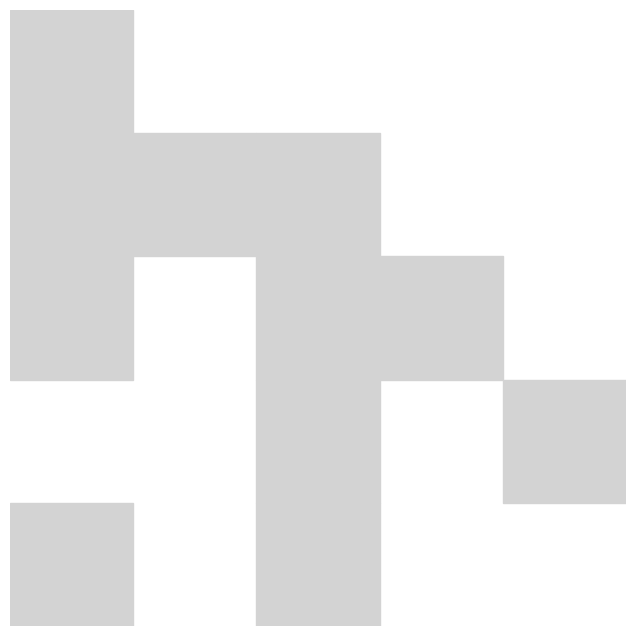

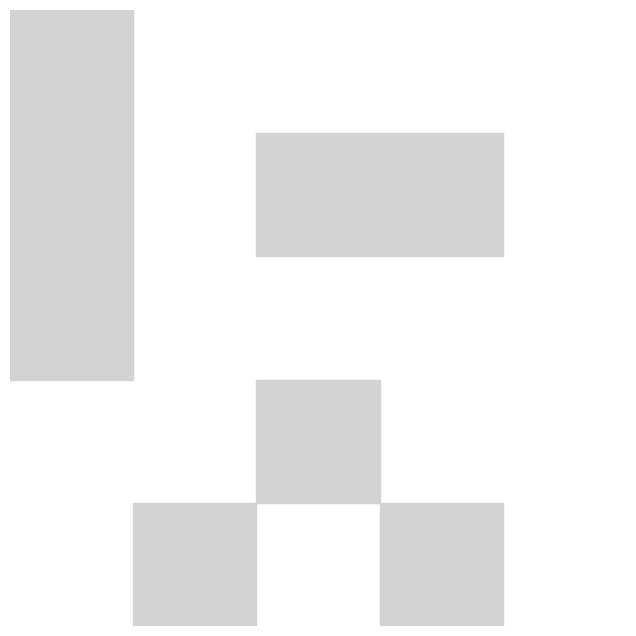

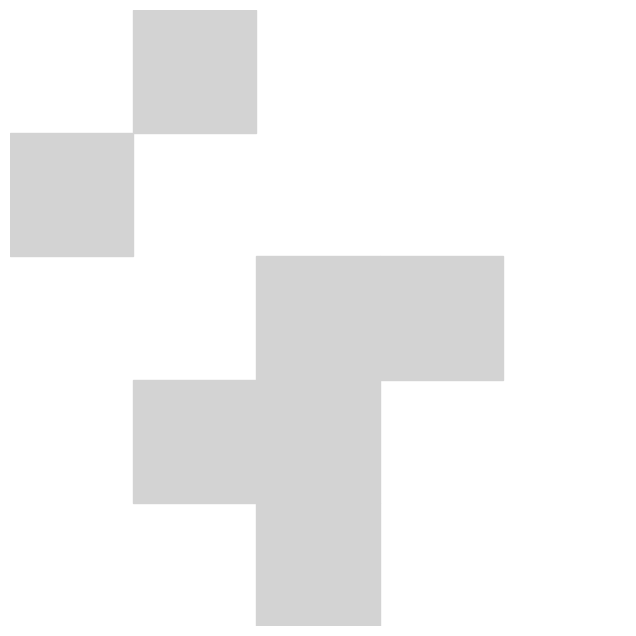

In [72]:
play_game_of_life_1()

#### Level 2 (user-specified rules, 15 pts)

From a randomly selected initial subset of life cells, and a user-specified set of rules, find interesting patterns.

A user can specify a rule by inputting four integers: $b_1$, $b_2$, $d_1$, and $d_2$ between $0$ and $8$, and $d_1 \leq b_1 \leq b_2 \le d_2$. The rules are as follows:

- if a dead cell has at least $b_1$ and at most $b_2$ neighbors alive, then it the comes back to life
- if an alive cell has at least $d_1$ and at most $d_2$ neighbors alive, then it continues to be alive.
- if an alive cell has less than $d_1$ or more than $d_2$ neighbors alive, then the cell dies.

Notice that if $b_1 = 3$, $b_2 = 3$, $d_1 = 2$, and $d_2 = 3$, then the rules are the **basic rules**.

##### Task 2.1

The same as Task 1.1.

```python
def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return init_life_state_1(n, m, p)
```

In [ ]:
def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    
    IN:
    - n: int, number of rows in the grid
    - m: int, number of columns in the grid
    - p: float, probability of a cell being alive (between 0 and 1)
    
    OUT:
    - ndarray of shape (n, m), initial state of the cells (randomly generated)
    """
    # Validate inputs
    if not isinstance(n, int) or n <= 0:
        raise ValueError("The number of rows (n) must be a positive integer.")
    if not isinstance(m, int) or m <= 0:
        raise ValueError("The number of columns (m) must be a positive integer.")
    if not (0 <= p <= 1):
        raise ValueError("The probability (p) must be between 0 and 1.")
    
    # Generate random grid using the same logic as init_life_state_1
    return np.random.choice([0, 1], size=(n, m), p=[1-p, p])


##### Task 2.2

Implement a Python function `update_life_state_2()` that takes the same in input as `update_life_state_1()` plus the four integers that defaults to `b1=3, b2=3, d1=2, d2=3` and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

```python
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        b1, int, lower bound of the number of neighbors for a dead cell to come back to life
        b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
        d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    pass
```

Or you can create a constructor for `update_life_state_2()` as follows:

```python
def generate_update_life_state_2(b1=3, b2=3, d1=2, d2=3):
    """
    Generate a function that updates the life state according to the specified rules
    IN: b1, int, lower bound of the number of neighbors
        b2, int, upper bound of the number of neighbors
        d1, int, lower bound of the number of neighbors
        d2, int, upper bound of the number of neighbors
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # define the update function using b1, b2, d1, and d2
    def update_life_state_2(life_state, out_life_state=None):
        """
        For each cell evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        # specify the update rules using b1, b2, d1, and d2
        pass

    # return the defined function
    return update_life_state_2
```

In [ ]:
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state.
    
    IN:
    - life_state: ndarray of shape (n, m), initial state of the cells
    - b1: int, lower bound of the number of neighbors for a dead cell to come back to life (default 3)
    - b2: int, upper bound of the number of neighbors for a dead cell to come back to life (default 3)
    - d1: int, lower bound of the number of neighbors for an alive cell to continue to be alive (default 2)
    - d2: int, upper bound of the number of neighbors for an alive cell to continue to be alive (default 3)
    - out_life_state: ndarray of shape (n, m), for storing the next state of the cells. If None, create a new array.
    
    OUT:
    - ndarray of shape (n, m), next state of the cells.
    """
    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)

    for x in range(n):
        for y in range(m):
            # Get the neighbors for each cell (including itself for ease)
            neighbors = life_state[max(0, x-1):min(n, x+2), max(0, y-1):min(m, y+2)]
            alive_neighbors = np.sum(neighbors) - life_state[x, y]  # Subtract current cell itself

            # Apply rules for a dead cell (life_state[x, y] == 0)
            if life_state[x, y] == 0:
                if b1 <= alive_neighbors <= b2:
                    out_life_state[x, y] = 1  # Cell comes to life

            # Apply rules for an alive cell (life_state[x, y] == 1)
            elif life_state[x, y] == 1:
                if d1 <= alive_neighbors <= d2:
                    out_life_state[x, y] = 1  # Cell survives
                else:
                    out_life_state[x, y] = 0  # Cell dies

    return out_life_state


##### Task 2.3

The same as Task 1.3.

In [ ]:

import numpy as np  # Make sure numpy is imported
import matplotlib.pyplot as plt

def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    if not (0 <= p <= 1):
        raise ValueError("The probability (p) must be between 0 and 1.")
    return np.random.choice([0, 1], size=(n, m), p=[1-p, p])

def draw_life_state_1(life_state):
    """
    Visualize the current life state as a grid.
    IN: life_state, ndarray of shape (n, m), current state of the cells.
    OUT: Displays the grid as an image.
    """
    plt.imshow(life_state, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title("Game of Life - Current State")
    plt.show()

# Example for Task 2.3
n, m, p = 10, 10, 0.3  # Grid size and probability of alive cells
life_state = init_life_state_2(n, m, p)
draw_life_state_1(life_state)


##### Task 2.4

Implement a Python function `play_game_of_life_2()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules, and when saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary. For the **basic rules**, the JSON format should be as follows:
```json
{
    "b1": 3,
    "b2": 3,
    "d1": 2,
    "d2": 3
}
```

```python
def play_game_of_life_2():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    pass
    # ask the user for the rules
    pass
    # update the grid and display it at each iteration
    pass
    # ask the user if he/she wants to update more times
    pass
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    pass
```

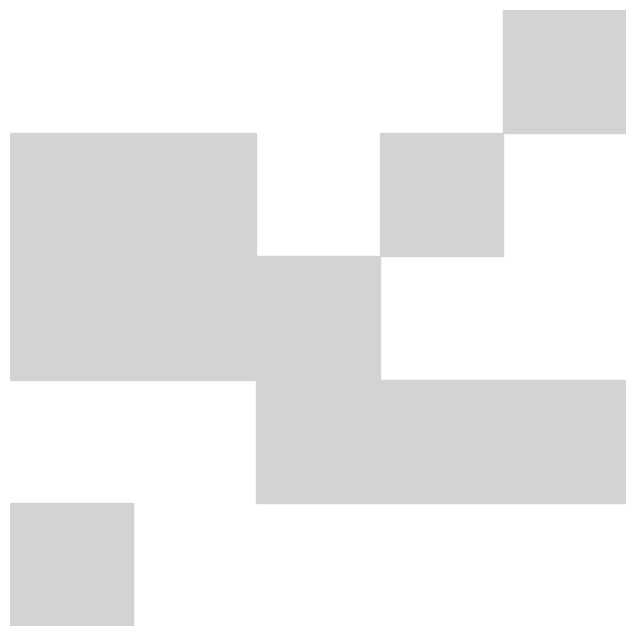

Please enter the rule parameters (between 0 and 8):


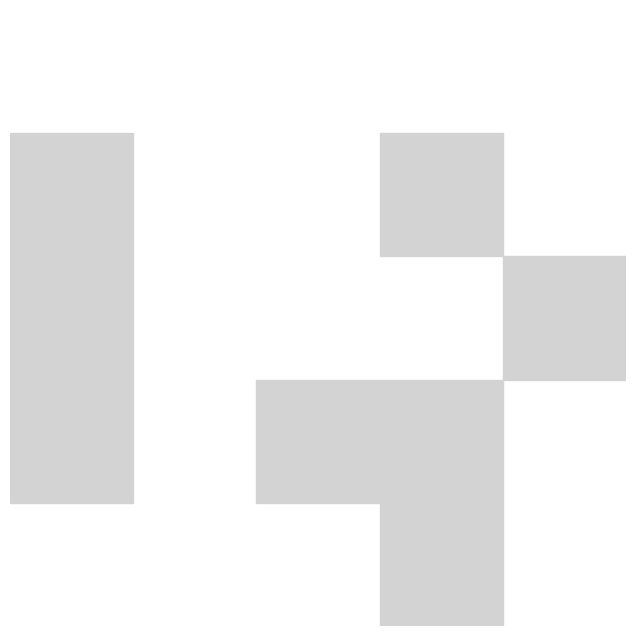

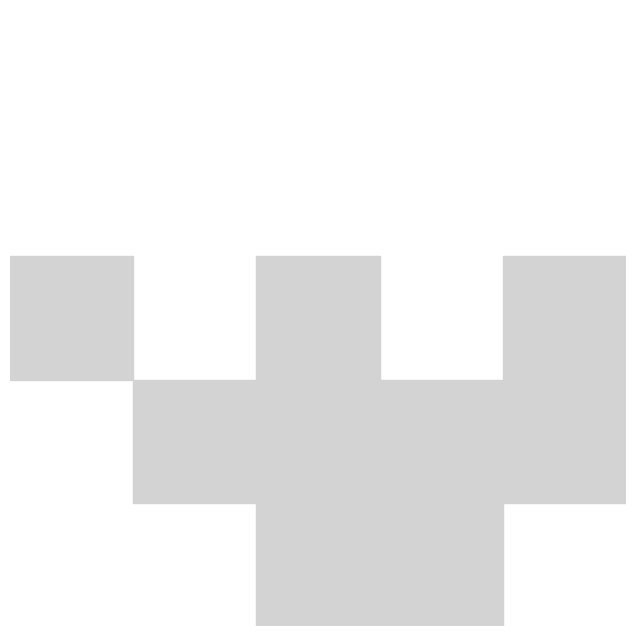

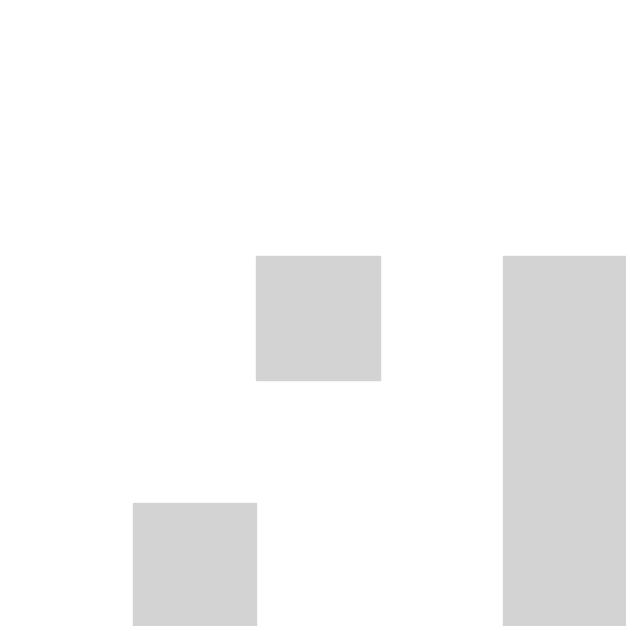

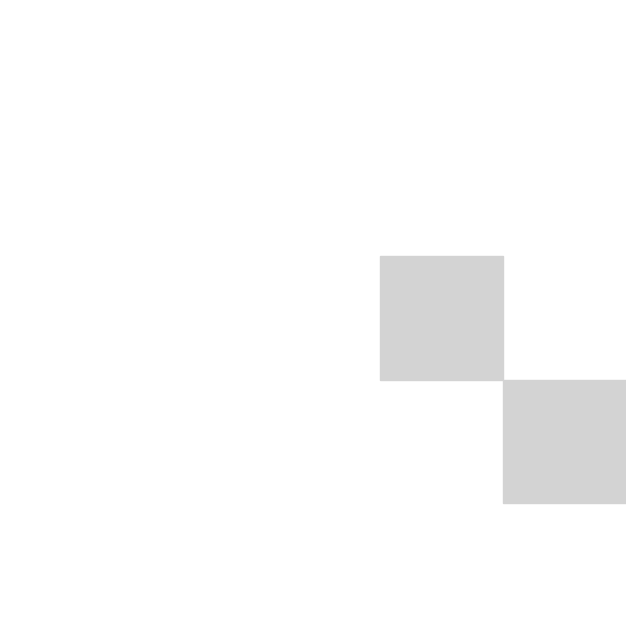

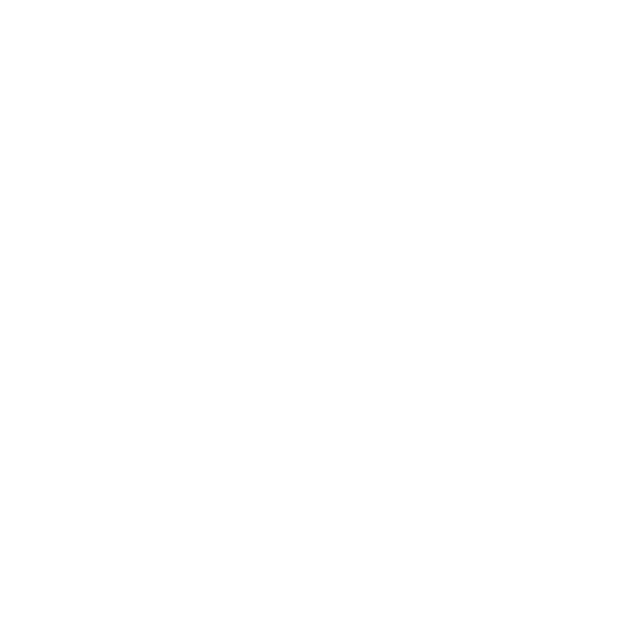

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import json

def play_game_of_life_2():
    """
    Play the game of life with user-defined rules
    IN: None
    OUT: None
    """
    # Ask the user for initial state
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
    p = float(input("Enter the probability of a cell being alive (0-1): "))
    
    # Generate the initial life state
    life_state = init_life_state_2(n, m, p)
    draw_life_state_1(life_state)
    
    # Ask the user for rules (b1, b2, d1, d2)
    print("Please enter the rule parameters (between 0 and 8):")
    b1 = int(input("Enter the lower bound (b1) for dead cells to come back to life: "))
    b2 = int(input("Enter the upper bound (b2) for dead cells to come back to life: "))
    d1 = int(input("Enter the lower bound (d1) for alive cells to stay alive: "))
    d2 = int(input("Enter the upper bound (d2) for alive cells to stay alive: "))
    
    # Validate the input rules
    if not (0 <= b1 <= 8 and 0 <= b2 <= 8 and 0 <= d1 <= 8 and 0 <= d2 <= 8):
        raise ValueError("Rule values must be between 0 and 8.")
    if not (d1 <= b1 <= b2 <= d2):
        raise ValueError("Ensure that d1 <= b1 <= b2 <= d2.")
    
    # Ask the user for the number of iterations
    iterations = int(input("Enter the number of iterations to simulate: "))
    
    # Update the grid and display it at each iteration
    for _ in range(iterations):
        life_state = update_life_state_2(life_state, b1, b2, d1, d2)
        draw_life_state_1(life_state)
    
    # Ask if the user wants to update more times
    while True:
        more_updates = input("Do you want to update more times? (yes/no): ").strip().lower()
        if more_updates == 'yes':
            additional_iterations = int(input("Enter the number of additional iterations: "))
            for _ in range(additional_iterations):
                life_state = update_life_state_2(life_state, b1, b2, d1, d2)
                draw_life_state_1(life_state)
        elif more_updates == 'no':
            break
        else:
            print("Please enter 'yes' or 'no'.")
    
    # Ask if the user wants to save the initial and final states as CSV files, and rules as a JSON file
    save = input("Do you want to save the initial and final states as CSV files, and the rules as a JSON file? (yes/no): ").strip().lower()
    if save == 'yes':
        # Save initial and final states as CSV
        np.savetxt("initial_state.csv", init_life_state_2(n, m, p), fmt='%d', delimiter=',')
        np.savetxt("final_state.csv", life_state, fmt='%d', delimiter=',')
        
        # Save the rules as a JSON file
        rules = {"b1": b1, "b2": b2, "d1": d1, "d2": d2}
        with open("rules.json", 'w') as json_file:
            json.dump(rules, json_file, indent=4)
        
        print("Initial state saved as 'initial_state.csv', final state saved as 'final_state.csv', and rules saved as 'rules.json'.")
#testing purposes
play_game_of_life_2()

#### Level 3 (non-binary states, 30 pts)

In this level, the states of the cells are not binary. Instead, the states are integers between $0$ and $255$, each representing a user specified state. For example, each cell may have three possibilities:
- $0$ to represent a removed cell
- $1$ to represent a live and susceptible cell
- $2$ to represent a cell infected by a virus

A set of rules could be:

A subset of cells is selected randomly to be infected (2), and the rest are susceptible (1). The grid is updated in each time step as follows:

- Infected (2) cells get a chance to pass the infection along to each of their Susceptible (1) neighbors, with a probability equal to the transmission rate.
- Infected (2) cells have a chance to transition to the removed (0) state, indicating that they are no longer capable of infecting others or being infected again. The probability of this transition is equal to the recovery rate.

```mermaid
stateDiagram-v2

S: Susceptible
I: Infected
R: Removed

S --> I: neighbor of an infected cell, and the infected cell infects the susceptible cell
S --> S: no infected neighbor, or the infected cell does not infect the susceptible cell
I --> R: recovers
R --> R
```

##### Task 3.1

After playing the game at https://meltingasphalt.com/interactive/going-critical/ and https://ncase.me/simulating/model/

- Implement a Python function `init_life_state_3()` by using NumPy to generate an initial random subset of non-binary cells.
- Implement a Python function `draw_life_state_3()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in their respective colors with transparency.
```python
def draw_cell_background(x, y, color):
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color=color, alpha=0.5)
```

In [ ]:
def draw_cell_background(x, y, color):
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color=color, alpha=0.5)

```python
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return np.random.choice(states, size=(n, m), p=p_list)

```

```python
def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    n, m = life_state.shape
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    
    for x in range(n):
        for y in range(m):
            state = life_state[x, y]
            draw_cell_background(x, y, colors[state])
    
    plt.xlim(-0.5, n-0.5)
    plt.ylim(-0.5, m-0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
```

In [ ]:
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return np.random.choice(states, size=(n, m), p=p_list)

def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    n, m = life_state.shape
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    
    for x in range(n):
        for y in range(m):
            state = life_state[x, y]
            draw_cell_background(x, y, colors[state])
    
    plt.xlim(-0.5, n-0.5)
    plt.ylim(-0.5, m-0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

##### Task 3.2

Implement a Python function `update_life_state_3()` that takes a 2D NumPy array representing the current state of the grid, and a dictionary specifying the rules, and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

For the Susceptible-Infected-Removed rules, the dictionary should be as follows:
```python
rules = {
    0: [  # removed cells
        {
            "turn_to": 0  # always stay removed
        }
    ],
    1: [  # susceptible cells
        {
            "neighbor_to": {
                "if": [  # adjacent to at least 1 infected cell (type 2)
                    {
                        "at_least": 1,
                        "at_most": 9,  # always true
                        "type": 2
                    }
                ],
                "then": {
                    "probability": [  # 25% chance of getting infected and 75% chance of staying susceptible
                        {
                            "value": 0.25,  # transmission rate 25%
                            "then": {
                                "turn_to": 2
                            },
                        },
                        {
                            "value": 0.75,  # leftover 75%
                            "then": {
                                "turn_to": 1
                            }
                        }
                    ]
                }
            }
        }
    ],
    2: [
        {  # infected cells
            "probability": [  # 50% chance of recovering and 50% chance of staying infected
                {
                    "value": 0.5,  # recovery rate 50%
                    "then": {
                        "turn_to": 0
                    }
                },
                {
                    "value": 0.5,  # leftover 50%
                    "then": {
                        "turn_to": 2
                    }
                }
            ]
        }
    ]
}
```

In [ ]:
rules = {
    0: [  # removed cells
        {
            "turn_to": 0  # always stay removed
        }
    ],
    1: [  # susceptible cells
        {
            "neighbor_to": {
                "if": [  # adjacent to at least 1 infected cell (type 2)
                    {
                        "at_least": 1,
                        "at_most": 9,  # always true
                        "type": 2
                    }
                ],
                "then": {
                    "probability": [  # 25% chance of getting infected and 75% chance of staying susceptible
                        {
                            "value": 0.25,  # transmission rate 25%
                            "then": {
                                "turn_to": 2
                            },
                        },
                        {
                            "value": 0.75,  # leftover 75%
                            "then": {
                                "turn_to": 1
                            }
                        }
                    ]
                }
            }
        }
    ],
    2: [
        {  # infected cells
            "probability": [  # 50% chance of recovering and 50% chance of staying infected
                {
                    "value": 0.5,  # recovery rate 50%
                    "then": {
                        "turn_to": 0
                    }
                },
                {
                    "value": 0.5,  # leftover 50%
                    "then": {
                        "turn_to": 2
                    }
                }
            ]
        }
    ]
}

```python
def update_life_state_3(life_state, rules_dict, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, rules for updating the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)

    for x in range(n):
        for y in range(m):
            state = life_state[x, y]
            neighbors = life_state[max(0, x-1):min(n, x+2), max(0, y-1):min(m, y+2)].flatten()
            neighbors = neighbors[neighbors != state]  # Exclude the current cell
            
            # Apply rules for the current cell state
            for rule in rules_dict[state]:
                if "neighbor_to" in rule:  # Neighbor-based rule
                    neighbor_condition = rule["neighbor_to"]["if"]
                    num_neighbors = np.sum(neighbors == neighbor_condition["type"])
                    if neighbor_condition["at_least"] <= num_neighbors <= neighbor_condition["at_most"]:
                        for prob_rule in rule["neighbor_to"]["then"]["probability"]:
                            if np.random.random() <= prob_rule["value"]:
                                out_life_state[x, y] = prob_rule["then"]["turn_to"]
                                break
                        break
                elif "probability" in rule:  # Probability-based rule
                    for prob_rule in rule["probability"]:
                        if np.random.random() <= prob_rule["value"]:
                            out_life_state[x, y] = prob_rule["then"]["turn_to"]
                            break
                    break
            else:
                out_life_state[x, y] = state  # Retain current state if no rule applies

    return out_life_state
```

Or you can create a constructor for `update_life_state_3()` as follows:

```python
def generate_update_life_state_3(rules_dict):
    """
    Generate a function that updates the life state according to the specified rules
    IN: rules_dict, dict, rules for updating the cells
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # define the update function using rules_dict
    def update_life_state_3(life_state, out_life_state=None):
        """
        For each cell evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        # specify the update rules using rules_dict
        n, m = life_state.shape
        if out_life_state is None:
            out_life_state = np.zeros((n, m), dtype=int)

        for x in range(n):
            for y in range(m):
                state = life_state[x, y]
                neighbors = life_state[max(0, x-1):min(n, x+2), max(0, y-1):min(m, y+2)].flatten()
                neighbors = neighbors[neighbors != state]  # Exclude the current cell
                
                # Apply rules for the current cell state
                for rule in rules_dict[state]:
                    if "neighbor_to" in rule:  # Neighbor-based rule
                        neighbor_condition = rule["neighbor_to"]["if"]
                        num_neighbors = np.sum(neighbors == neighbor_condition["type"])
                        if neighbor_condition["at_least"] <= num_neighbors <= neighbor_condition["at_most"]:
                            for prob_rule in rule["neighbor_to"]["then"]["probability"]:
                                if np.random.random() <= prob_rule["value"]:
                                    out_life_state[x, y] = prob_rule["then"]["turn_to"]
                                    break
                            break
                    elif "probability" in rule:  # Probability-based rule
                        for prob_rule in rule["probability"]:
                            if np.random.random() <= prob_rule["value"]:
                                out_life_state[x, y] = prob_rule["then"]["turn_to"]
                                break
                        break
                else:
                    out_life_state[x, y] = state  # Retain current state if no rule applies

        return out_life_state

    # return the defined function
    return update_life_state_3
```

In [ ]:

def update_life_state_3(life_state, rules_dict, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, rules for updating the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)

    for x in range(n):
        for y in range(m):
            current_state = life_state[x, y]
            applicable_rules = rules[current_state]  # Rules for the current cell's state
            
            for rule in applicable_rules:
                if "neighbor_to" in rule:  # Neighbor-based rule
                    neighbor_to = rule["neighbor_to"]
                    neighbor_condition = neighbor_to["if"]
                    
                    # Count neighbors of the specified type
                    neighbors = life_state[max(0, x-1):min(n, x+2), max(0, y-1):min(m, y+2)].flatten()
                    neighbors = neighbors[neighbors != current_state]  # Exclude the current cell
                    num_neighbors = np.sum(neighbors == neighbor_condition["type"])
                    
                    if neighbor_condition["at_least"] <= num_neighbors <= neighbor_condition["at_most"]:
                        # Apply probability-based changes
                        for prob_rule in neighbor_to["then"]:  # Iterate through the list of rules
                            if np.random.random() <= prob_rule["value"]:  # Check probability
                                out_life_state[x, y] = prob_rule["then"]["turn_to"]
                                break
                        break
                elif "probability" in rule:  # Probability-based rule
                    for prob_rule in rule["probability"]:
                        if np.random.random() <= prob_rule["value"]:  # Check probability
                            out_life_state[x, y] = prob_rule["then"]["turn_to"]
                            break
                    break
            else:
                # Retain the current state if no rules apply
                out_life_state[x, y] = current_state

    return out_life_state


##### Task 3.3

Similar to Task 1.3, except that the function to be called is `draw_life_state_3()`.

In [ ]:
n, m = 5, 5  # Define the grid size
p_list = [0.3, 0.4, 0.3]  # Probabilities for each state: Removed, Susceptible, Infected
states = [0, 1, 2]  # Define the states
colors = ['white', 'blue', 'red']  # Colors corresponding to the states

# Generate the initial life state
life_state = init_life_state_3(n, m, p_list, states)

# Visualize the life state
draw_life_state_3(life_state, colors)
plt.show()

##### Task 3.4

Implement a Python function `play_game_of_life_3()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules as a JSON file in the format of a dictionary. When saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary.

In [ ]:

def play_game_of_life_3():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    print("Enter grid size and probabilities for each state (e.g., '5,5,0.3,0.4,0.3'):")
        initial_input = input("Format: rows,columns,probabilities: ")
        *grid_size, *probabilities = map(float, initial_input.split(","))
        rows, cols = map(int, grid_size[:2])
        p_list = probabilities
        
        if not abs(sum(p_list) - 1.0) < 1e-6:  # Check if probabilities sum to 1
            raise ValueError("Probabilities must sum to 1.0.")
        
        states = list(range(len(p_list)))  # Dynamically define states based on probabilities
        colors = ['gray', 'blue', 'red', 'green', 'yellow', 'orange', 'purple'][:len(states)]  # Extend colors as needed
        initial_state = init_life_state_3(rows, cols, p_list, states)
        current_state = initial_state.copy()
    except ValueError as e:
        print(f"Invalid input: {e}")
        return

    # Ask the user for rules
    rules_option = input("Do you want to load rules from a JSON file? (yes/no): ").strip().lower()
    if rules_option == "yes":
        try:
            rules_file = input("Enter the name of the JSON file (e.g., 'rules.json'): ").strip()
            with open(rules_file, "r") as f:
                rules_dict = json.load(f)
            rules_dict = {int(k): v for k, v in rules_dict.items()}  # Ensure integer keys for rules
        except FileNotFoundError:
            print("File not found. Exiting.")
            return
    else:
        print("Define rules for each state as one line (e.g., 'state,neighbor/probability,type,at_least,at_most,turn_to,probability'):")
        print("Separate multiple rules with a semicolon (;). Example input:")
        print("neighbor,2,1,8,3,0.5;probability,,,3,,0.3")
        
        rules_dict = {}
        for state in states:
            print(f"Define rules for state {state} (leave empty if no rules):")
            rules_input = input().strip()
            state_rules = []
            if rules_input:
                for rule in rules_input.split(";"):
                    rule_parts = rule.split(",")
                    rule_type = rule_parts[0].strip()
                    if rule_type == "neighbor":
                        neighbor_type = int(rule_parts[1])
                        at_least = int(rule_parts[2])
                        at_most = int(rule_parts[3])
                        turn_to = int(rule_parts[4])
                        prob_value = float(rule_parts[5])
                        state_rules.append({
                            "neighbor_to": {
                                "if": {"type": neighbor_type, "at_least": at_least, "at_most": at_most},
                                "then": [{"value": prob_value, "then": {"turn_to": turn_to}}]
                            }
                        })
                    elif rule_type == "probability":
                        prob_value = float(rule_parts[5])
                        turn_to = int(rule_parts[4])
                        state_rules.append({
                            "probability": [{"value": prob_value, "then": {"turn_to": turn_to}}]
                        })
            rules_dict[state] = state_rules

    # Display the initial state
    print("\nInitial State:")
    draw_life_state_3(current_state, colors)
    plt.show()

    # Update the grid iteratively
    while True:
        try:
            iterations = int(input("\nEnter the number of iterations to update the grid: "))
        except ValueError:
            print("Invalid input. Please enter an integer.")
            continue
        
        for i in range(iterations):
            print(f"\nIteration {i+1}/{iterations}")
            update_life_state = generate_update_life_state_3(rules_dict)
            current_state = update_life_state(current_state)
            draw_life_state_3(current_state, colors)
            plt.show()

        # Ask if the user wants to continue
        more_updates = input("Do you want to update more times? (yes/no): ").strip().lower()
        if more_updates != "yes":
            break

    # Save configurations
    save_to_file = input("Do you want to save the initial/final configurations and rules to files? (yes/no): ").strip().lower()
    if save_to_file == "yes":
        # Save initial state to CSV
        with open("initial_state.csv", "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerows(initial_state)
        print("Initial state saved to 'initial_state.csv'.")

        # Save final state to CSV
        with open("final_state.csv", "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerows(current_state)
        print("Final state saved to 'final_state.csv'.")

        # Save rules to JSON
        with open("rules.json", "w") as f:
            json.dump(rules_dict, f, indent=4)
        print("Rules saved to 'rules.json'.")

    print("\nThank you for playing the Game of Life!")

# test
play_game_of_life_3()

: 

#### References

> - Gardner, Martin (October 1970). "The fantastic combinations of John Conway's new solitaire game 'life'" (PDF). Mathematical Games. Scientific American. Vol. 223, no. 4. pp. 120–123. doi:10.1038/scientificamerican1070-120. JSTOR 24927642.
> - Berlekamp, E. R.; Conway, John Horton; Guy, R. K. (2001–2004). Winning Ways for your Mathematical Plays (2nd ed.). A K Peters Ltd.
> - Izhikevich, Eugene M.; Conway, John H.; Seth, Anil (2015-06-21). "Game of Life". Scholarpedia. 10 (6): 1816. Bibcode:2015SchpJ..10.1816I. doi:10.4249/scholarpedia.1816. ISSN 1941-6016.
> - "NaiveLife Emulated: A reading-order simulation of Life". ConwayLife.com. 24 May 2020.
> - Goucher, Adam. "Re: Thread For Your Accidental Discoveries". ConwayLife.com.
> - Ian07. "Re: Strange spaceship that is supposed to be impossible and infinite cell spread". ConwayLife.com. "I'm pretty sure this is because you've accidentally created an implementation of what's sometimes known as NaiveLife (as it's a common mistake made by many people coding CGoL for the first time):"
> - Brown, Nico; Cheng, Carson; Jacobi, Tanner; Karpovich, Maia; Merzenich, Matthias; Raucci, David; Riley, Mitchell (5 December 2023). "Conway's Game of Life is Omniperiodic". arXiv:2312.02799 [math.CO].
> - "LifeWiki:Game of Life Status page - LifeWiki". conwaylife.com.
> - Stone, Alex (2024-01-18). "Math's 'Game of Life' Reveals Long-Sought Repeating Patterns". Quanta Magazine.
> - "Conway's Game of Life". Rosetta Code. June 7, 2024.